In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

from util import load_data, fdr, plot_report

%matplotlib inline

In [2]:
x_train, x_test, y_train, y_test = load_data('var_w1.csv')
x_train.head()

ssn_name_dob_count_7  ssn_dob_count_0_by_14  name_dob_count_0_by_14  \
492199             -0.055635               0.118004                0.118316   
57422              -0.055635               0.118004                0.118316   
467449             -0.055635               0.118004                0.118316   
68190              -0.055635               0.118004                0.118316   
336893             -0.055635               0.118004                0.118316   

        ssn_firstname_count_0_by_14  name_count_7  \
492199                     0.123528     -0.115648   
57422                      0.123528     -0.115648   
467449                     0.123528     -0.115648   
68190                      0.123528     -0.115648   
336893                     0.123528     -0.115648   

        fulladdress_homephone_count_0_by_14  name_day_since  \
492199                             0.120387        0.354405   
57422                              0.120387       -1.158117   
467449                             0.120387       -1.214837   
68190                              0.120387       -1.120304   
336893                             0.120387       -0.184431   

        homephone_count_7  homephone_count_3  address_count_1_by_7  ...  \
492199           0.055132           0.639149              0.103441  ...   
57422           -0.769214          -0.521454              0.103441  ...   
467449           3.352517           1.799751              0.103441  ...   
68190            0.879479          -0.521454              0.103441  ...   
336893           0.055132          -0.521454              0.103441  ...   

        fulladdress_homephone_count_7  ssn_firstname_count_7  \
492199                      -0.057263              -0.057185   
57422                       -0.057263              -0.057185   
467449                      -0.057263              -0.057185   
68190                       -0.057263              -0.057185   
336893                      -0.057263              -0.057185   

        ssn_lastname_count_0_by_14  ssn_lastname_day_since  ssn_name_count_7  \
492199                    0.123458                0.152951         -0.057109   
57422                     0.123458               -1.368531         -0.057109   
467449                    0.123458                0.067368         -0.057109   
68190                     0.123458               -1.330494         -0.057109   
336893                    0.123458               -0.389077         -0.057109   

        name_count_14  ssn_count_7  ssn_dob_count_7  ssn_lastname_count_7  \
492199      -0.159376    -0.058092        -0.055708             -0.057154   
57422       -0.159376    -0.058092        -0.055708             -0.057154   
467449       1.496715    -0.058092        -0.055708             -0.057154   
68190       -0.159376    -0.058092        -0.055708             -0.057154   
336893      -0.159376    -0.058092        -0.055708             -0.057154   

        ssn_name_day_since  
492199            0.152424  
57422            -1.369047  
467449            0.066842  
68190            -1.331010  
336893           -0.389600  

[5 rows x 25 columns]

In [3]:
lr = LogisticRegression(max_iter=1000)
params = {'C': [10 ** i for i in range(-4, 1)],
          'class_weight': ['balanced', None]}
clf = GridSearchCV(lr, params, cv=10, refit='FDR', verbose=1,
                   n_jobs=4, scoring={'FDR': fdr, 'ROC': 'roc_auc'})
clf.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   55.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  7.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=4,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1],
                         'class_weight': ['balanced', None]},
             pre_dispatch='2*n_jobs', refit='FDR', return_train_score=False,
             scoring={'FDR': <function fdr at 0x7fba1ef30268>,
                      'ROC': 'roc_auc'},
             verbose=1)

In [4]:
print(f"The best parameters are {clf.best_params_} "
      f"with a score of {clf.best_score_:0.5f}")

The best parameters are {'C': 0.1, 'class_weight': 'balanced'} with a score of 0.53199


In [5]:
pd.DataFrame(clf.cv_results_).filter(
    items=['mean_fit_time', 'mean_score_time',
           'params', 'mean_test_FDR','std_test_FDR',
           'rank_test_FDR', 'mean_test_ROC', 'std_test_ROC'])

mean_fit_time  mean_score_time                                     params  \
0       3.253965         0.537304  {'C': 0.0001, 'class_weight': 'balanced'}   
1       1.815509         0.560595        {'C': 0.0001, 'class_weight': None}   
2       5.726209         0.571122   {'C': 0.001, 'class_weight': 'balanced'}   
3       3.858616         0.621460         {'C': 0.001, 'class_weight': None}   
4      11.726470         0.620048    {'C': 0.01, 'class_weight': 'balanced'}   
5       8.318122         0.615861          {'C': 0.01, 'class_weight': None}   
6      25.521487         0.630717     {'C': 0.1, 'class_weight': 'balanced'}   
7      19.531959         0.636790           {'C': 0.1, 'class_weight': None}   
8      43.205458         0.641074       {'C': 1, 'class_weight': 'balanced'}   
9      33.755904         0.612665             {'C': 1, 'class_weight': None}   

   mean_test_FDR  std_test_FDR  rank_test_FDR  mean_test_ROC  std_test_ROC  
0       0.529288      0.011599              4       0.768731      0.006803  
1       0.522140      0.013325              6       0.765905      0.006530  
2       0.529027      0.011502              5       0.769563      0.006373  
3       0.516387      0.013363             10       0.766542      0.006161  
4       0.531554      0.011575              3       0.769826      0.006422  
5       0.516561      0.012850              9       0.767308      0.005145  
6       0.531990      0.012100              1       0.769728      0.006342  
7       0.519002      0.013057              8       0.767840      0.004948  
8       0.531990      0.012100              1       0.769677      0.006278  
9       0.519089      0.013543              7       0.767767      0.004855

FDR: 0.5234508729887025

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    197079
           1       0.22      0.53      0.31      2921

    accuracy                           0.97    200000
   macro avg       0.61      0.75      0.65    200000
weighted avg       0.98      0.97      0.97    200000



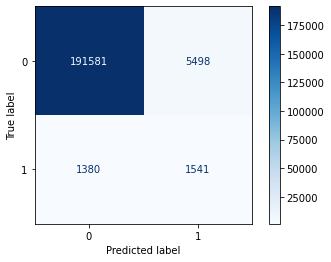

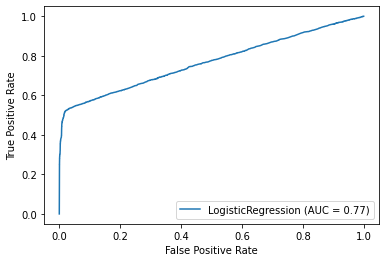

In [6]:
lr = LogisticRegression(max_iter=1000, **clf.best_params_).fit(x_train, y_train)
plot_report(lr, x_test, y_test)